In [1]:
!ls
!pwd

Jitter Plots.ipynb           archived
README.md                    data
SVD                          praat.Collection
SVD jitter shimmer hnr.ipynb scripts
Untitled.ipynb               testSVD
/Users/leochoo/dev/GP2-dev


In [2]:
# initialize
import glob
import parselmouth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# filepath for the dataset
# root = "/Users/leochoo/dev/GP2-dev/SVD"
root = "./testSVD"

my_data_path = root + "/my_dat
healthy_path = root + "/healthy"
patho_path = root + "/pathological"

!ls {patho_path}
print(my_data_path)
# on MacOS, it creates a hidden .DS_Store folder that only be shown using `ls -la` command. You should delete it to ge the code working! :)

functional      hyperfunctional organic         psychogenic
./testSVD/my_data


In [3]:
from tqdm import tqdm
from time import sleep

def get_voice_data(_path):
    # select .wav files only
    wav_files = glob.glob(_path + "/*.wav")

    n_list = []
    tone_list = []
    syllab_list = []

    j_list = []
    s_list = []
    h_list = []

    # for wav_file in wav_files:
    for wav_file in tqdm(wav_files): # tqdm shows the progress bar
        sound = parselmouth.Sound(wav_file) # sound object from wav file
        pitch = sound.to_pitch()
        pulses = parselmouth.praat.call([sound, pitch], "To PointProcess (cc)")

        # name analysis
        name = os.path.basename(wav_file).split(".")[0]  
        
        ## tone
        if "l" in name:
            tone_list.append("l")
        elif "n" in name:
            tone_list.append("n")
        elif "h" in name:
            tone_list.append("h")

        ## syllable
        if "a" in name:
            syllab_list.append("a")
        elif "i" in name:
            syllab_list.append("i")
        elif "u" in name:
            syllab_list.append("u")
        # jitter
        jitter_local = parselmouth.praat.call(pulses, "Get jitter (local)", 0.0, 0.0, 0.0001, 0.02, 1.3) * 100

        # shimmer
        shimmer_local = parselmouth.praat.call([sound, pulses], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)

        # HNR
        harmonicity = parselmouth.praat.call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
        hnr = parselmouth.praat.call(harmonicity, "Get mean", 0, 0)

        # Append to dataframe
        n_list.append(name)
        j_list.append(jitter_local)
        s_list.append(shimmer_local)
        h_list.append(hnr)


    # create dataframe
    df = pd.DataFrame({"Name":pd.Series(n_list),
                        "Type": np.nan,
                        "Tone": pd.Series(tone_list),
                        "Syllab": pd.Series(syllab_list),
                           "Jitter":pd.Series(j_list),
                           "Shimmer":pd.Series(s_list),
                           "HNR":pd.Series(h_list)})
    df["Type"]= _path.split("/")[-1] # identify type: my_data, healthy, functional etc...
    df = df.dropna()
    return df


In [4]:
# get data and show dataframe
my_data_df = get_voice_data(my_data_path)
my_data_df.head()

100%|██████████| 4/4 [00:00<00:00,  4.14it/s]


,Name,Type,Tone,Syllab,Jitter,Shimmer,HNR
0,myd_a_l,my_data,l,a,0.487569,0.023036,21.677873
1,myd_a_n,my_data,n,a,0.222252,0.017838,28.288537
2,myd_i_l,my_data,l,i,0.279021,0.013981,28.079217
3,myd_i_n,my_data,n,i,0.164563,0.011110,30.354595


In [5]:

healthy_df = get_voice_data(my_data_path)
healthy_df.head()

functional_df = get_voice_data(patho_path + "/functional")
functional_df.head()

hyperfunctional_df = get_voice_data(patho_path + "/hyperfunctional")
hyperfunctional_df.head()

organic_df = get_voice_data(patho_path + "/organic")
organic_df.head()

100%|██████████| 18/18 [00:01<00:00, 10.59it/s]


,Name,Type,Tone,Syllab,Jitter,Shimmer,HNR
0,445-i_l,organic,l,i,0.540254,0.018591,24.334806
1,368-i_l,organic,l,i,0.860867,0.036633,23.453634
2,368-i_n,organic,n,i,0.702390,0.047442,23.530683
3,445-i_n,organic,n,i,0.492549,0.018804,24.754686
4,445-i_h,organic,h,i,0.305428,0.018783,26.966682


In [6]:
psychogenic_df = get_voice_data(patho_path + "/psychogenic")
psychogenic_df.head()

100%|██████████| 45/45 [00:03<00:00, 13.05it/s]


,Name,Type,Tone,Syllab,Jitter,Shimmer,HNR
0,741-i_l,psychogenic,l,i,0.430327,0.010875,31.476183
1,741-i_n,psychogenic,n,i,0.173764,0.008791,35.010031
2,151-i_h,psychogenic,h,i,0.078759,0.004855,37.420852
3,151-i_l,psychogenic,l,i,0.148556,0.006630,30.717961
4,741-i_h,psychogenic,h,i,0.173467,0.006333,32.859001


In [41]:
# file number count
# all gender

# functional
#     1008

# hyperfunctional
#     1916

# organic
#      909
     
# psychogenic
#      819
file_numbers = [1008, 1916, 909, 819]
print(file_numbers)
print("# of people per type", [x//9 for x in file_numbers]) #f, h, o, p

[1008, 1916, 909, 819]
# of people per type [112, 212, 101, 91]


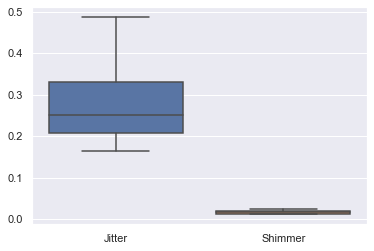

In [7]:
sns.set()
sns.boxplot(data = my_data_df.drop(["HNR"], axis=1))


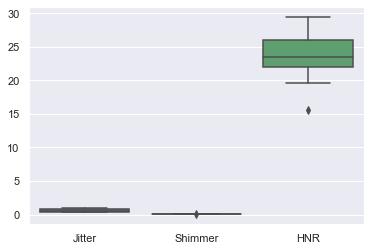

In [8]:
sns.boxplot(data = organic_df)
plt.show()

In [9]:
frames = [my_data_df, organic_df]

result = pd.concat(frames, keys=["my_data","organic"])
result.head()

Name     Type Tone Syllab    Jitter   Shimmer        HNR
my_data 0  myd_a_l  my_data    l      a  0.487569  0.023036  21.677873
        1  myd_a_n  my_data    n      a  0.222252  0.017838  28.288537
        2  myd_i_l  my_data    l      i  0.279021  0.013981  28.079217
        3  myd_i_n  my_data    n      i  0.164563  0.011110  30.354595
organic 0  445-i_l  organic    l      i  0.540254  0.018591  24.334806

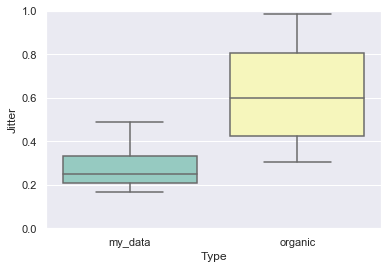

In [10]:
plt.ylim(0, 1)
sns.boxplot(x="Type", y="Jitter", data=result, palette="Set3")


In [11]:
organic_df.loc[organic_df.Tone == "l"]

,Name,Type,Tone,Syllab,Jitter,Shimmer,HNR
0,445-i_l,organic,l,i,0.540254,0.018591,24.334806
1,368-i_l,organic,l,i,0.860867,0.036633,23.453634
10,445-u_l,organic,l,u,0.690482,0.031553,25.089014
11,368-u_l,organic,l,u,0.902104,0.070926,19.781639
12,368-a_l,organic,l,a,0.964770,0.036703,22.765588
13,445-a_l,organic,l,a,0.653534,0.046101,19.602004


In [12]:
organic_df.loc[(organic_df.Tone == "l") & (organic_df.Syllab == "i")]

,Name,Type,Tone,Syllab,Jitter,Shimmer,HNR
0,445-i_l,organic,l,i,0.540254,0.018591,24.334806
1,368-i_l,organic,l,i,0.860867,0.036633,23.453634


In [13]:
def select_from_data(_df, _tone, _syllab, _param):
    result = _df.loc[(_df.Tone == _tone) & (_df.Syllab == _syllab)][_param]
    return result

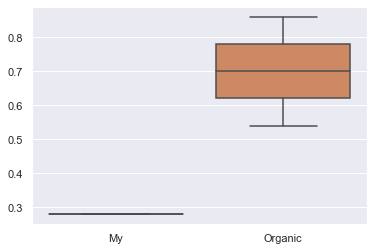

In [14]:
my_jitter = select_from_data(my_data_df, "l", "i", "Jitter")
organic_jitter = select_from_data(organic_df, "l", "i", "Jitter")
my_organic_j = pd.DataFrame({"My":pd.Series(my_jitter), "Organic":pd.Series(organic_jitter)})
sns.boxplot(data = my_organic_j)

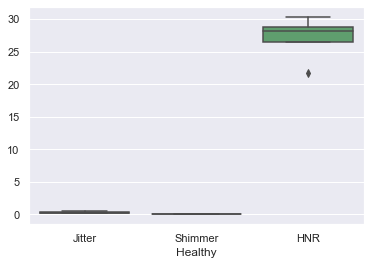

In [15]:
plt.xlabel("Healthy")
sns.boxplot(data = healthy_df)

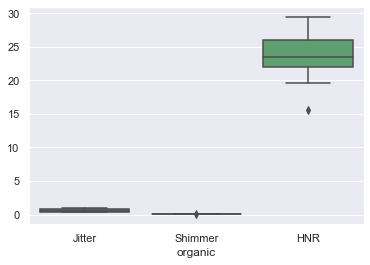

In [16]:
plt.xlabel("organic")
sns.boxplot(data = organic_df)

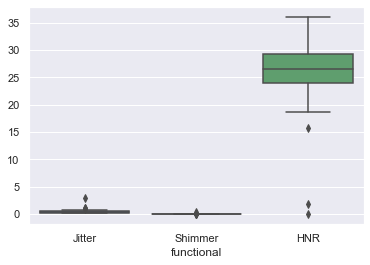

In [17]:
plt.xlabel("functional")
sns.boxplot(data = functional_df)

In [18]:
functional_df

,Name,Type,Tone,Syllab,Jitter,Shimmer,HNR
0,722-i_h,functional,h,i,0.338489,0.022091,28.632004
1,718-a_l,functional,l,a,1.011255,0.064156,15.701683
2,634-a_n,functional,n,a,0.264270,0.018504,27.254048
3,723-i_l,functional,l,i,2.892800,0.287673,-0.075351
4,631-i_h,functional,h,i,0.115224,0.005719,32.715783
...,...,...,...,...,...,...,...
58,718-i_h,functional,h,i,0.346852,0.019692,25.779266
59,350-u_n,functional,n,u,0.391050,0.028963,27.678851
60,723-a_h,functional,h,a,0.218677,0.015837,28.487121
61,631-a_n,functional,n,a,0.641955,0.083706,18.596267


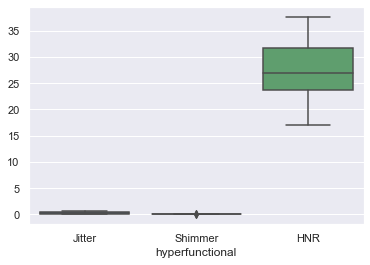

In [19]:
plt.xlabel("hyperfunctional")
sns.boxplot(data = hyperfunctional_df)

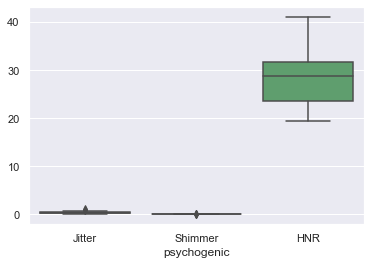

In [20]:
plt.xlabel("psychogenic")
sns.boxplot(data = psychogenic_df)

In [21]:
# dict of dataframes
dict_df = {"my_data": my_data_df,
"healthy": healthy_df,
"functional": functional_df,
"hyperfunctional": hyperfunctional_df,
"organic": organic_df,
"psychogenic": psychogenic_df,
}

In [22]:
for k,v in dict_df.items():
    print(k)


my_data
healthy
functional
hyperfunctional
organic
psychogenic


In [23]:
# selecting for tone and syllab
def select_tone_syllab(_tone, _syllab, _param):
    global dict_df
    result_df = pd.DataFrame()
    for type, _df in dict_df.items():
        selected_column = _df.loc[(_df.Tone == _tone) & (_df.Syllab == _syllab)][_param].values
        additional = pd.DataFrame({type: selected_column})
        result_df = pd.concat([result_df, additional], axis=1)
    return result_df

In [24]:
filtered_df = select_tone_syllab("l", "a", "Jitter")
filtered_df.head()

,my_data,healthy,functional,hyperfunctional,organic,psychogenic
0,0.487569,0.487569,1.011255,0.411039,0.964770,0.508194
1,NaN,NaN,0.444071,0.653374,0.653534,1.204170
2,NaN,NaN,0.131557,NaN,NaN,0.516479
3,NaN,NaN,0.479336,NaN,NaN,0.254183
4,NaN,NaN,0.992442,NaN,NaN,0.100698


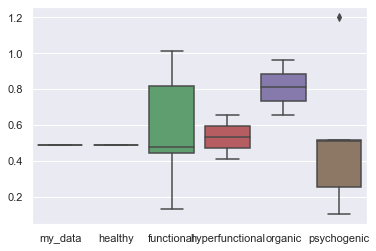

In [25]:
sns.boxplot(data=filtered_df)

In [26]:
# selecting just for tone
def select_one_tone(_tone, _param):
    global dict_df
    result_df = pd.DataFrame()
    for type, _df in dict_df.items():
        selected_column = _df.loc[(_df.Tone == _tone)][_param].values
        additional = pd.DataFrame({type: selected_column})
        result_df = pd.concat([result_df, additional], axis=1)
    return result_df

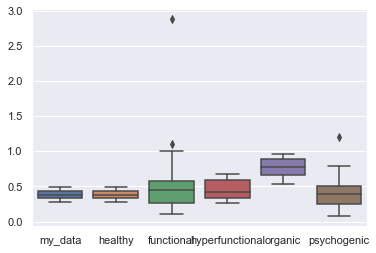

In [27]:
# box plot for all jitter in low tone
all_jitter_l = select_one_tone("l","Jitter")
sns.boxplot(data = all_jitter_l)

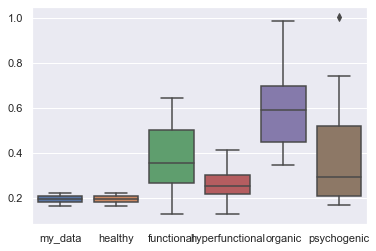

In [28]:
# box plot for all jitter in low tone
all_jitter_n = select_one_tone("n","Jitter")
sns.boxplot(data = all_jitter_n)

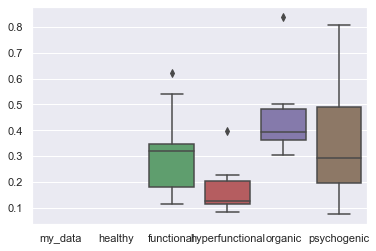

In [29]:
# box plot for all jitter in low tone
all_jitter_h = select_one_tone("h","Jitter")
sns.boxplot(data = all_jitter_h)

In [30]:
# 
frames = [my_data_df, organic_df, functional_df]

myd_org = pd.concat(frames, keys=["my_data","organic", "functional"])
myd_org.loc[myd_org.Syllab == "a"]


Name        Type Tone Syllab    Jitter   Shimmer        HNR
my_data    0   myd_a_l     my_data    l      a  0.487569  0.023036  21.677873
           1   myd_a_n     my_data    n      a  0.222252  0.017838  28.288537
organic    12  368-a_l     organic    l      a  0.964770  0.036703  22.765588
           13  445-a_l     organic    l      a  0.653534  0.046101  19.602004
           14  445-a_n     organic    n      a  0.987353  0.080456  15.625524
           15  368-a_n     organic    n      a  0.435160  0.042159  20.478885
           16  368-a_h     organic    h      a  0.839461  0.049347  23.597963
           17  445-a_h     organic    h      a  0.419651  0.034329  22.937231
functional 1   718-a_l  functional    l      a  1.011255  0.064156  15.701683
           2   634-a_n  functional    n      a  0.264270  0.018504  27.254048
           6   634-a_l  functional    l      a  0.444071  0.051766  20.543494
           7   718-a_n  functional    n      a  0.341587  0.025726  25.049294
           9   634-a_h  functional    h      a  0.264270  0.018504  27.254048
           13  718-a_h  functional    h      a  0.227630  0.023922  25.960426
           15  350-a_n  functional    n      a  0.149364  0.024658  28.264699
           20  351-a_h  functional    h      a  0.622685  0.037482  22.785389
           22  350-a_l  functional    l      a  0.131557  0.016773  29.744053
           23  350-a_h  functional    h      a  0.178579  0.017611  27.779174
           26  351-a_l  functional    l      a  0.479336  0.041689  22.565679
           28  351-a_n  functional    n      a  0.503399  0.050224  21.277874
           42  722-a_h  functional    h      a  0.539370  0.054911  23.575152
           45  723-a_l  functional    l      a  0.992442  0.049290   1.855494
           49  723-a_n  functional    n      a  0.365645  0.024721  23.689415
           51  631-a_h  functional    h      a  0.332696  0.027191  25.650099
           53  722-a_n  functional    n      a  0.538932  0.051079  24.717541
           55  631-a_l  functional    l      a  0.641955  0.083706  18.596267
           60  723-a_h  functional    h      a  0.218677  0.015837  28.487121
           61  631-a_n  functional    n      a  0.641955  0.083706  18.596267
           62  722-a_l  functional    l      a  0.445241  0.018103  24.405212

# can graph Jitter, Shimmer, HNR for all other dicts
dd = pd.melt(myd_org, id_vars=["Type"], value_vars=["Jitter", "Shimmer"])
dd.head

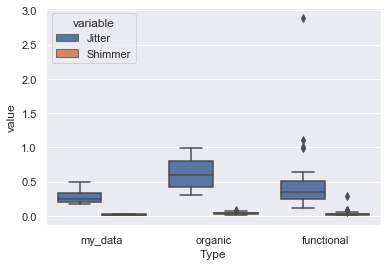

In [32]:
sns.boxplot(x="Type", y="value", data=dd, hue="variable")